In [57]:
import numpy as np
import pandas as pd

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [59]:
sns.set_style('darkgrid')

In [60]:
import nltk
import re

In [61]:
import string

In [62]:
from nltk.corpus import stopwords

In [63]:
from nltk.stem import WordNetLemmatizer

In [67]:
#nltk.download('wordnet')

In [64]:
df = pd.read_csv('dataFiles/mbti_1.csv')
df.head()

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


In [4]:
df = pd.read_csv('dataFiles/dataFile.csv')
df.head()

,type,posts,IE,NS,TF,JP,processed_post
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,1,1,0,1,moment sportscent top ten play prank ha lifech...
1,ENTP,'I'm finding the lack of me in these posts ver...,0,1,1,0,im find lack post veri alarm sex bore posit of...
2,INTP,'Good one _____ https://www.youtube.com/wat...,1,1,1,0,good one cours say know bless curs doe absolut...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",1,1,1,1,dear enjoy convers day esoter gab natur univer...
4,ENTJ,'You're fired.|||That's another silly misconce...,0,1,1,1,fire anoth silli misconcept approach logic go ...


In [7]:
# Creating a new dataframe
df_new = pd.DataFrame()

In [9]:
#df_new = df[df['IE'] == 1].head(50)

In [33]:
#df_new = df_new.append(df[df['JP'] == 1].head(50))

([array([106.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 294.]),
  array([ 77.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 323.]),
  array([216.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 184.]),
  array([223.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 177.])],
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 4 Lists of Patches objects>)

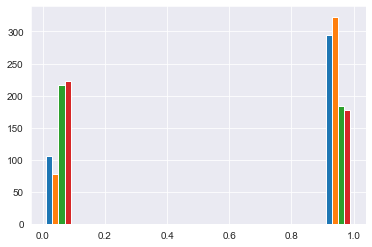

In [39]:
plt.hist([df_new['IE'], df_new['NS'], df_new['TF'], df_new['JP']])

In [71]:
sum(df_new['IE'])/400

0.735

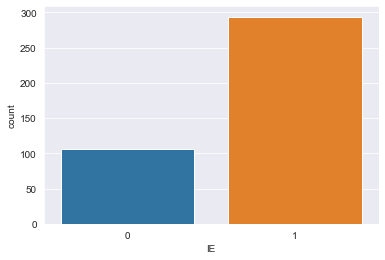

In [45]:
sns.countplot(df_new['IE'])

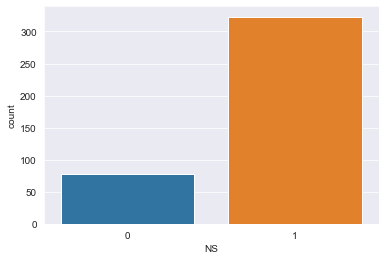

In [42]:
sns.countplot(df_new['NS'])

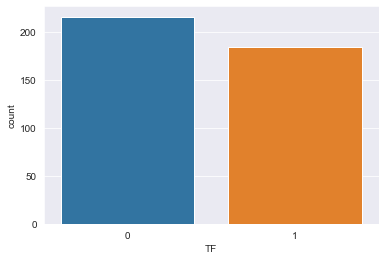

In [46]:
sns.countplot(df_new['TF'])

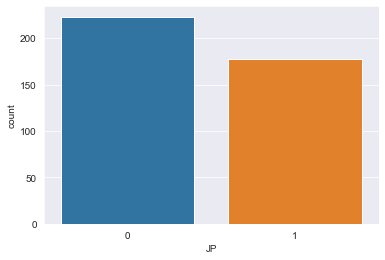

In [47]:
sns.countplot(df_new['JP'])

In [49]:
#df_new.drop('processed_post', axis=1, inplace=True)

In [50]:
df_new.head()

,type,posts,IE,NS,TF,JP
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,1,1,0,1
2,INTP,'Good one _____ https://www.youtube.com/wat...,1,1,1,0
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",1,1,1,1
5,INTJ,'18/37 @.@|||Science is not perfect. No scien...,1,1,1,1
6,INFJ,"'No, I can't draw on my own nails (haha). Thos...",1,1,0,1


In [51]:
df_new.to_csv('toy_data.csv', index=False)

## Add columns for the type indicatiors

In [135]:
def get_types(row):
    t=row['type']

    I = 0; N = 0
    T = 0; J = 0
    
    if t[0] == 'I': I = 1
    elif t[0] == 'E': I = 0
    else: print('I-E incorrect')
        
    if t[1] == 'N': N = 1
    elif t[1] == 'S': N = 0
    else: print('N-S incorrect')
        
    if t[2] == 'T': T = 1
    elif t[2] == 'F': T = 0
    else: print('T-F incorrect')
        
    if t[3] == 'J': J = 1
    elif t[3] == 'P': J = 0
    else: print('J-P incorrect')
    return pd.Series( {'IE':I, 'NS':N , 'TF': T, 'JP': J }) 

### Label indicatiors
* Introvert 1 | Extrovert 0
* Intuition 1 | Sensing 0
* Thinking 1 | Feeling 0
* Judging 1 | Perciving 0

In [136]:
df = df.join(df.apply (lambda row: get_types (row),axis=1))
df.head(5)

,type,posts,IE,NS,TF,JP
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,1,1,0,1
1,ENTP,'I'm finding the lack of me in these posts ver...,0,1,1,0
2,INTP,'Good one _____ https://www.youtube.com/wat...,1,1,1,0
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",1,1,1,1
4,ENTJ,'You're fired.|||That's another silly misconce...,0,1,1,1


In [130]:
sum(df['wc'])/len(df['processed_post'])

655.0727377521614

(array([  24.,   65.,  169.,  324.,  658., 1198., 1964., 2418., 1628.,
         227.]),
 array([  3. , 100.3, 197.6, 294.9, 392.2, 489.5, 586.8, 684.1, 781.4,
        878.7, 976. ]),
 <a list of 10 Patch objects>)

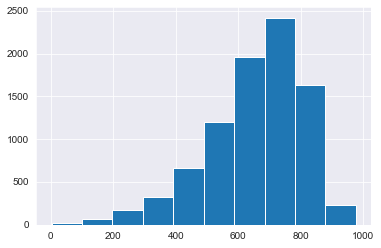

In [131]:
plt.hist(df['wc'])

In [128]:
df['wc'] = df['processed_post'].apply(lambda x:len(x.split()))

In [129]:
df.head()

,type,posts,IE,NS,TF,JP,processed_post,wc
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,1,1,0,1,moment sportscent top ten play prank ha lifech...,323
1,ENTP,'I'm finding the lack of me in these posts ver...,0,1,1,0,im find lack post veri alarm sex bore posit of...,608
2,INTP,'Good one _____ https://www.youtube.com/wat...,1,1,1,0,good one cours say know bless curs doe absolut...,480
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",1,1,1,1,dear enjoy convers day esoter gab natur univer...,579
4,ENTJ,'You're fired.|||That's another silly misconce...,0,1,1,1,fire anoth silli misconcept approach logic go ...,512


In [127]:
df['processed_post'].describe()

count                                                  8675
unique                                                 8675
top       honestli doesnt help onli part understood wa s...
freq                                                      1
Name: processed_post, dtype: object

In [53]:
# processing the data
def preprocess_string(x_str, return_joined=True):
    '''Returns a cleaned string specifically from the MBTI dataset.
    If return_joined is True, the tokens are joined into a single string so
    that it can be passed into SciKit learn's frequency counter. Otherwise
    the tokens are returned as a list.'''

    # lower
    x_str = x_str.lower()

    # remove |||
    x_str = re.sub("[]|||[]", " ", x_str)

    # remove http links
    x_str = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', x_str)

    # remove puncuation
    x_str = "".join([ci for ci in x_str if ci not in string.punctuation])

    # tokenise
    tokens = nltk.word_tokenize(x_str)

    # stem
    #porter = nltk.PorterStemmer()
    #stemmed_tokens = [porter.stem(token) for token in tokens]
    # lemmatize
    lemm = WordNetLemmatizer()
    stemmed_tokens = [lemm.lemmatize(token) for token in tokens]

    # remove stop words
    stopped_tokens = [ti for ti in stemmed_tokens if ti not in stopwords.words("english")]

    # remove MBTI types
    MBTI_types = ['INFJ', 'ENTP', 'INTP', 'INTJ', 'ENTJ', 'ENFJ', 'INFP', 'ENFP',
                  'ISFP', 'ISTP', 'ISFJ', 'ISTJ', 'ESTP', 'ESFP', 'ESTJ', 'ESFJ']
    MBTI_types = [ti.lower() for ti in MBTI_types]

    final_tokens = [wi for wi in stopped_tokens if wi not in MBTI_types]

    if return_joined:
        return " ".join([ci for ci in final_tokens])

    return final_tokens

In [138]:
df['processed_post'] = df['posts'].apply(lambda x:preprocess_string(x,True))

In [139]:
df.head()

,type,posts,IE,NS,TF,JP,processed_post
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,1,1,0,1,moment sportscent top ten play prank ha lifech...
1,ENTP,'I'm finding the lack of me in these posts ver...,0,1,1,0,im find lack post veri alarm sex bore posit of...
2,INTP,'Good one _____ https://www.youtube.com/wat...,1,1,1,0,good one cours say know bless curs doe absolut...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",1,1,1,1,dear enjoy convers day esoter gab natur univer...
4,ENTJ,'You're fired.|||That's another silly misconce...,0,1,1,1,fire anoth silli misconcept approach logic go ...


In [15]:
#df.to_csv (r'export_dataframe.csv', index = None, header=True)

## Train Test Split

In [10]:
from sklearn.model_selection import train_test_split

In [112]:
X = df['processed_post']
y = df['type']

y_IE = df['IE']
y_NS = df['NS']
y_TF = df['TF']
y_JP = df['JP']

In [113]:
# splitting the training and test set, 70:30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [114]:
X_train, X_test, y_ie_train, y_ie_test = train_test_split(X, y_IE, test_size=0.3, random_state = 101)

In [115]:
X_train, X_test, y_ns_train, y_ns_test = train_test_split(X, y_NS, test_size=0.3, random_state = 101)

In [116]:
X_train, X_test, y_tf_train, y_tf_test = train_test_split(X, y_TF, test_size=0.3, random_state = 101)

In [117]:
X_train, X_test, y_jp_train, y_jp_test = train_test_split(X, y_JP, test_size=0.3, random_state = 101)

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [18]:
from sklearn.pipeline import Pipeline

In [51]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score

## Majority Classifier

In [27]:
from sklearn.ensemble import VotingClassifier

In [79]:
from sklearn.metrics import precision_recall_fscore_support, roc_curve, auc

In [30]:
sum(y_ie_train)


4677

In [31]:
len(y_ie_train)

6072

In [37]:
round(sum(y_ie_train)/len(y_ie_train))

1

In [42]:
def Majority_Classifier(y_train, X_test):
    val = round(sum(y_train)/len(y_train))
    predictions = [val for i in X_test]
    return np.array(predictions)

In [43]:
predictions = Majority_Classifier(y_jp_train, X_test)

In [66]:
print(precision_recall_fscore_support(y_jp_test, predictions, average='weighted')[2])

0.45901607132232336


/Users/mehulnagpurkar/anaconda3/envs/analytics/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [65]:
print(classification_report(y_jp_test, predictions))

              precision    recall  f1-score   support

           0       0.61      1.00      0.76      1581
           1       0.00      0.00      0.00      1022

    accuracy                           0.61      2603
   macro avg       0.30      0.50      0.38      2603
weighted avg       0.37      0.61      0.46      2603



/Users/mehulnagpurkar/anaconda3/envs/analytics/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/mehulnagpurkar/anaconda3/envs/analytics/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/mehulnagpurkar/anaconda3/envs/analytics/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Naive Bayes Classifier

In [20]:
from sklearn.naive_bayes import MultinomialNB

In [67]:
train_label = [y_ie_train, y_ns_train, y_tf_train, y_jp_train]
test_label = [y_ie_test, y_ns_test, y_tf_test, y_jp_test]

In [89]:
model_accuracy = []
roc_list = []

for i in range(4):
    nb_pipeline = Pipeline([
        ('vector', CountVectorizer()),
        ('tfidf', TfidfTransformer()),
        ('Classifier', MultinomialNB())
    ])

    print(f'Fitting the model NB ... run {i}')

    nb_pipeline.fit(X_train, train_label[i])

    predictions = nb_pipeline.predict(X_test)

    #model_accuracy.append(precision_recall_fscore_support(test_label[i], predictions, average='weighted')[2])   
    #roc_list.append((fpr, tpr))
    
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    fpr, tpr, _ = roc_curve(test_label[i], predictions)
    roc_auc = auc(fpr, tpr)

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(test_label[i].ravel(), predictions.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

Fitting the model NB ... run 0


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [69]:
model_accuracy

[0.6671673759909629,
 0.8069905262036109,
 0.39339302203285303,
 0.45901607132232336]

In [82]:
roc_list[0][1]

array([nan, nan])

In [80]:
auc(roc_list[1][0], roc_list[1][1])

nan

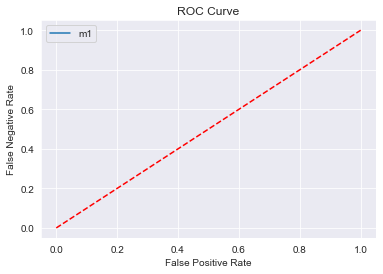

In [83]:
plt.plot(roc_list[1][0], roc_list[1][1])
#plt.plot(fpr_2, tpr_2,'y')
plt.plot([0,1],[0,1],'r--')

plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('False Negative Rate')

plt.legend(['m1'])

In [90]:
nb_pipeline = Pipeline([
    ('vector',CountVectorizer()),
    ('tfidf',TfidfTransformer()),
    ('Classifier',MultinomialNB())
])

In [91]:
nb_pipeline.fit(X_train, y_jp_train)

Pipeline(memory=None,
         steps=[('vector',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('Classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [92]:
predictions = nb_pipeline.predict(X_test)

In [93]:
print(confusion_matrix(y_jp_test, predictions))

[[1581    0]
 [1022    0]]


In [94]:
print(classification_report(y_jp_test, predictions))

              precision    recall  f1-score   support

           0       0.61      1.00      0.76      1581
           1       0.00      0.00      0.00      1022

    accuracy                           0.61      2603
   macro avg       0.30      0.50      0.38      2603
weighted avg       0.37      0.61      0.46      2603



/Users/mehulnagpurkar/anaconda3/envs/analytics/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/mehulnagpurkar/anaconda3/envs/analytics/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/mehulnagpurkar/anaconda3/envs/analytics/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [100]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_jp_test, predictions)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_jp_test.ravel(), predictions.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

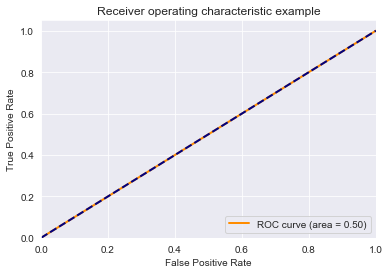

In [103]:
plt.figure()
lw = 2
plt.plot(fpr[1], tpr[1], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [96]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

# Import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
                                                    random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=random_state))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

## Random Forest

In [46]:
from sklearn.ensemble import RandomForestClassifier

In [58]:
rf_pipeline_1 = Pipeline([
    ('vector',CountVectorizer()),
    ('tfidf',TfidfTransformer()),
    ('Classifier',RandomForestClassifier(n_estimators=10))
])

In [59]:
rf_pipeline_1.fit(X_train, y_ie_train)

Pipeline(memory=None,
         steps=[('vector',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=N...
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features='auto',
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0

In [60]:
predictions_1 = rf_pipeline_1.predict(X_test)

In [61]:
print(classification_report(y_ie_test, predictions_1))

              precision    recall  f1-score   support

           0       0.29      0.08      0.13       604
           1       0.77      0.94      0.85      1999

    accuracy                           0.74      2603
   macro avg       0.53      0.51      0.49      2603
weighted avg       0.66      0.74      0.68      2603



In [62]:
rf_pipeline_2 = Pipeline([
    ('vector',CountVectorizer()),
    ('tfidf',TfidfTransformer()),
    ('Classifier',RandomForestClassifier(n_estimators=10))
])

In [63]:
rf_pipeline_2.fit(X_train, y_ns_train)

Pipeline(memory=None,
         steps=[('vector',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=N...
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features='auto',
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0

In [64]:
predictions_2 = rf_pipeline_2.predict(X_test)

In [65]:
print(classification_report(y_ns_test, predictions_2))

              precision    recall  f1-score   support

           0       0.18      0.01      0.03       343
           1       0.87      0.99      0.93      2260

    accuracy                           0.86      2603
   macro avg       0.52      0.50      0.48      2603
weighted avg       0.78      0.86      0.81      2603



In [66]:
rf_pipeline_3 = Pipeline([
    ('vector',CountVectorizer()),
    ('tfidf',TfidfTransformer()),
    ('Classifier',RandomForestClassifier(n_estimators=10))
])

In [67]:
rf_pipeline_3.fit(X_train, y_tf_train)

Pipeline(memory=None,
         steps=[('vector',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=N...
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features='auto',
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0

In [68]:
predictions_3 = rf_pipeline_3.predict(X_test)

In [69]:
print(classification_report(y_tf_test, predictions_3))

              precision    recall  f1-score   support

           0       0.60      0.80      0.69      1390
           1       0.63      0.39      0.49      1213

    accuracy                           0.61      2603
   macro avg       0.62      0.60      0.59      2603
weighted avg       0.62      0.61      0.59      2603



In [70]:
rf_pipeline_4 = Pipeline([
    ('vector',CountVectorizer()),
    ('tfidf',TfidfTransformer()),
    ('Classifier',RandomForestClassifier(n_estimators=10))
])

In [71]:
rf_pipeline_4.fit(X_train, y_jp_train)

Pipeline(memory=None,
         steps=[('vector',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=N...
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features='auto',
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0

In [72]:
predictions_4 = rf_pipeline_4.predict(X_test)

In [73]:
print(classification_report(y_jp_test, predictions_4))

              precision    recall  f1-score   support

           0       0.62      0.87      0.72      1581
           1       0.47      0.18      0.26      1022

    accuracy                           0.60      2603
   macro avg       0.55      0.52      0.49      2603
weighted avg       0.56      0.60      0.54      2603



## Checking against personality

In [91]:
pred_array = np.array([predictions_1, predictions_2, predictions_3, predictions_4])

In [92]:
pred_df = pd.DataFrame(pred_array.T)

In [86]:
pred_df['y_test'] = pd.DataFrame(y_test.T)

In [93]:
pred_df.head()

,0,1,2,3
0,1,1,1,0
1,1,1,0,0
2,1,1,0,0
3,0,1,0,0
4,1,1,0,0


In [106]:
pred_list = []
for tup in zip(predictions_1, predictions_2, predictions_3, predictions_4):
    mystring = []
    if tup[0] == 1:
        mystring += 'I'
    else:
        mystring += 'E'
        
    if tup[1] == 1:
        mystring += 'N'
    else:
        mystring += 'S'
        
    if tup[2] == 1:
        mystring += 'T'
    else:
        mystring += 'F'
        
    if tup[3] == 1:
        mystring += 'J'
    else:
        mystring += 'P'
        
    pred_list.append(''.join(mystring))

In [109]:
pred_array = np.array(pred_list)

In [110]:
print(classification_report(y_test, pred_array))

              precision    recall  f1-score   support

        ENFJ       0.04      0.02      0.03        52
        ENFP       0.06      0.03      0.04       214
        ENTJ       0.00      0.00      0.00        65
        ENTP       0.09      0.02      0.03       206
        ESFJ       0.00      0.00      0.00        10
        ESFP       0.00      0.00      0.00        13
        ESTJ       0.00      0.00      0.00         7
        ESTP       0.00      0.00      0.00        27
        INFJ       0.15      0.08      0.11       437
        INFP       0.21      0.54      0.31       577
        INTJ       0.09      0.04      0.05       314
        INTP       0.14      0.22      0.17       375
        ISFJ       0.00      0.00      0.00        52
        ISFP       0.00      0.00      0.00        88
        ISTJ       0.00      0.00      0.00        64
        ISTP       0.12      0.01      0.02       102

    accuracy                           0.17      2603
   macro avg       0.06   

/Users/mehulnagpurkar/anaconda3/envs/analytics/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/mehulnagpurkar/anaconda3/envs/analytics/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/mehulnagpurkar/anaconda3/envs/analytics/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [111]:
y_test[:10]

893     INTP
752     INFJ
7296    INTJ
5647    INTP
8509    INTJ
7938    ISTJ
3320    ISFP
748     INTP
5956    ISTP
469     INFP
Name: type, dtype: object

In [112]:
pred_list[:10]

['INTP',
 'INFP',
 'INFP',
 'ENFP',
 'INFP',
 'INFP',
 'ENTP',
 'INFP',
 'INFP',
 'INFJ']

In [113]:
pred_df = pd.DataFrame(pred_array.T)

In [114]:
pred_df['y_test'] = pd.DataFrame(y_test.T)

In [117]:
#pred_df.columns = ['predictions', 'y_test']

In [118]:
pred_df.head()

,predictions,y_test
0,INTP,INFJ
1,INFP,NaN
2,INFP,NaN
3,ENFP,INTJ
4,INFP,NaN


In [122]:
len(y_test)

2603

In [123]:
from collections import defaultdict

correct_predictions = defaultdict(int)

for tup in zip(pred_array, y_test):
    if tup[0] == tup[1]:
        correct_predictions[tup[0]] += 1

In [124]:
correct_predictions

defaultdict(int,
            {'INTP': 81,
             'INFJ': 37,
             'INFP': 312,
             'INTJ': 11,
             'ENTP': 4,
             'ENFP': 6,
             'ENFJ': 1,
             'ISTP': 1})

In [126]:
sum(correct_predictions.values())

453

In [127]:
sum(correct_predictions.values())/len(y_test)

0.17402996542451019

In [128]:
# try to represent the probability of personality on some n space
# give a list of potential personality types, and commonalities in that

## SVM Classifier

In [18]:
from sklearn.svm import SVC

In [20]:
rf_pipeline_5 = Pipeline([
    ('vector',CountVectorizer()),
    ('tfidf',TfidfTransformer()),
    ('Classifier',SVC())
])

In [21]:
rf_pipeline_5.fit(X_train, y_ie_train)

/Users/mehulnagpurkar/anaconda3/envs/analytics/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Pipeline(memory=None,
         steps=[('vector',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('Classifier',
                 SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3,
        

In [22]:
predictions_5 = rf_pipeline_5.predict(X_test)

In [23]:
print(classification_report(y_ie_test, predictions_5))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       604
           1       0.77      1.00      0.87      1999

    accuracy                           0.77      2603
   macro avg       0.38      0.50      0.43      2603
weighted avg       0.59      0.77      0.67      2603



/Users/mehulnagpurkar/anaconda3/envs/analytics/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/mehulnagpurkar/anaconda3/envs/analytics/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/mehulnagpurkar/anaconda3/envs/analytics/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [25]:
svm_pipeline_2 = Pipeline([
    ('vector',CountVectorizer()),
    ('tfidf',TfidfTransformer()),
    ('Classifier',SVC())
])

In [26]:
svm_pipeline_2.fit(X_train, y_ns_train)

/Users/mehulnagpurkar/anaconda3/envs/analytics/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Pipeline(memory=None,
         steps=[('vector',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('Classifier',
                 SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3,
        

In [27]:
predictions_2 = svm_pipeline_2.predict(X_test)

In [28]:
print(classification_report(y_ns_test, predictions_2))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       343
           1       0.87      1.00      0.93      2260

    accuracy                           0.87      2603
   macro avg       0.43      0.50      0.46      2603
weighted avg       0.75      0.87      0.81      2603



/Users/mehulnagpurkar/anaconda3/envs/analytics/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/mehulnagpurkar/anaconda3/envs/analytics/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/mehulnagpurkar/anaconda3/envs/analytics/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [30]:
svm_pipeline_3 = Pipeline([
    ('vector',CountVectorizer()),
    ('tfidf',TfidfTransformer()),
    ('Classifier',SVC())
])

In [31]:
svm_pipeline_3.fit(X_train, y_tf_train)

/Users/mehulnagpurkar/anaconda3/envs/analytics/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Pipeline(memory=None,
         steps=[('vector',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('Classifier',
                 SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3,
        

In [33]:
predictions_3 = svm_pipeline_3.predict(X_test)

In [34]:
print(classification_report(y_tf_test, predictions_3))

              precision    recall  f1-score   support

           0       0.53      1.00      0.70      1390
           1       0.00      0.00      0.00      1213

    accuracy                           0.53      2603
   macro avg       0.27      0.50      0.35      2603
weighted avg       0.29      0.53      0.37      2603



/Users/mehulnagpurkar/anaconda3/envs/analytics/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/mehulnagpurkar/anaconda3/envs/analytics/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/mehulnagpurkar/anaconda3/envs/analytics/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [35]:
svm_pipeline_4 = Pipeline([
    ('vector',CountVectorizer()),
    ('tfidf',TfidfTransformer()),
    ('Classifier',SVC())
])

In [ ]:
svm_pipeline_4.fit(X_train, y_jp_train)

In [ ]:
predictions_4 = svm_pipeline_4.predict(X_test)

In [ ]:
print(classification_report(y_jp_test, predictions_4))

In [58]:
dd = {'majority':[1, 2], 'multi':[2, 5]}

In [61]:
pd.DataFrame.from_dict(dd, orient='index', columns=['I/E', 'B'])

,I/E,B
majority,1,2
multi,2,5


## Logistic Regression

In [104]:
from sklearn.linear_model import LogisticRegression

In [118]:
lr_pipeline = Pipeline([
            ('vector', CountVectorizer()),
            ('tfidf', TfidfTransformer()),
            ('Classifier', LogisticRegression())
        ])

In [119]:
lr_pipeline.fit(X_train, y_jp_train)
predictions = lr_pipeline.predict(X_test)

/Users/mehulnagpurkar/anaconda3/envs/analytics/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [120]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_jp_test, predictions)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_jp_test.ravel(), predictions.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

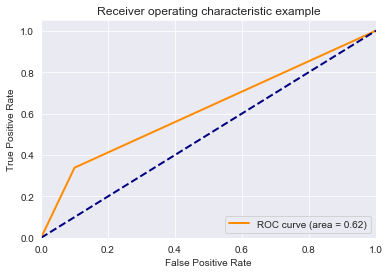

In [121]:
plt.figure()
lw = 2
plt.plot(fpr[1], tpr[1], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()